In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import json

In [3]:
from data_engineering import de

In [4]:
df = pd.read_csv("data/movie_data.csv")

/Users/daiglechris/Git/movie_ds_model/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,13,14,15,16,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# Initial analysis of dataframe
null_0 = pd.DataFrame(df.isnull().sum()).reset_index()
null_0.rename(columns={'index': 'factor', 0: 'num_null_0'}, inplace=True)
null_0.sort_values(by='num_null_0', axis=0, ascending=False, inplace=True)
null_0['miss_prop_0'] = round(null_0['num_null_0'] / df.shape[0], 4) * 100
df_info = {'obs_0':df.shape[0],
           'fac_0':df.shape[1],
           'null_0': null_0}
# Transformations to more accurately reflect data integrity issues
numeric_cols = ['budget', 'popularity', 'revenue',
                'runtime', 'vote_average', 'vote_count']
for col in numeric_cols:
    df[col] = df[col].apply(lambda x: pd.to_numeric(x, downcast='float', errors='coerce'))
df['id'] = df['id'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
df['release_date'] = df['release_date'].apply(lambda x: pd.to_datetime(x, errors='coerce'))
# Remove observations related to response variables
df = df.dropna(how='any', subset=['vote_count', 'vote_average', 'revenue'])
# Dataframe of the number of missing values after null removals
trans_0_null = pd.DataFrame(df.isnull().sum()).reset_index()
trans_0_null.rename(columns={'index': 'factor', 0: 'num_null_1'}, inplace=True)
trans_0_null['miss_prop_1'] = round(trans_0_null['num_null_1'] / df.shape[0], 4) * 100
null_1 = null_0.join(trans_0_null.set_index('factor'), on='factor')
# Update dataframe information dictionary
df_info['obs_1'] = df.shape[0]
df_info['fac_1'] = df.shape[1]
df_info['null_1'] = null_1

In [6]:
print("Initial observations: {:,}".format(df_info['obs_0']))
print("Number of observations after removing missing 'vote_count', 'vote_average', 'revenue': {:,}".format(df_info['obs_1']))

Initial observations: 133,744
Number of observations after removing missing 'vote_count', 'vote_average', 'revenue': 28,477


In [7]:
df_info['null_1'].sort_values('miss_prop_1', ascending=False)

,factor,num_null_0,miss_prop_0,num_null_1,miss_prop_1
2,homepage,114113,85.32,24461,85.90
15,tagline,120766,90.30,15499,54.43
6,overview,33226,24.84,458,1.61
12,runtime,105434,78.83,170,0.60
10,release_date,105375,78.79,111,0.39
13,spoken_languages,105264,78.71,0,0.00
3,id,32768,24.50,0,0.00
4,original_language,32768,24.50,0,0.00
5,original_title,32768,24.50,0,0.00
1,genres,32768,24.50,0,0.00


In [8]:
for col in df.columns:
    print(col)
    print(df[col].dtypes)
    print("{:.2%} null".format(df[col].isna().sum() / df.shape[0]))
    display(df[col].head())
    print("+" * len(col))

budget
float64
0.00% null


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: budget, dtype: float64

++++++
genres
object
0.00% null


0                       [{"id": 35, "name": "Comedy"}]
1                    [{"id": 12, "name": "Adventure"}]
2    [{"id": 10749, "name": "Romance"}, {"id": 18, ...
3                       [{"id": 35, "name": "Comedy"}]
4                                                   []
Name: genres, dtype: object

++++++
homepage
object
85.90% null


0                        NaN
1                        NaN
2                        NaN
3                        NaN
4    http://www.nwdfilms.com
Name: homepage, dtype: object

++++++++
id
float64
0.00% null


0     3924.0
1     6124.0
2     8773.0
3    21624.0
4    25449.0
Name: id, dtype: float64

++
original_language
object
0.00% null


0    en
1    de
2    fr
3    pa
4    en
Name: original_language, dtype: object

+++++++++++++++++
original_title
object
0.00% null


0                               Blondie
1                   Der Mann ohne Namen
2                   L'amour à vingt ans
3                      Jatts in Golmaal
4    New World Disorder 9: Never Enough
Name: original_title, dtype: object

++++++++++++++
overview
object
1.61% null


0    Blondie and Dagwood are about to celebrate the...
1    Der Mann ohne Namen is a German adventure movi...
2    Love at Twenty unites five directors from five...
3    Jatts in Golmal is an Comedy based movie. In w...
4    Gee Atherton ripping the Worlds course the day...
Name: overview, dtype: object

++++++++
popularity
float64
0.00% null


0    3.067
1    0.845
2    3.701
3    0.600
4    1.212
Name: popularity, dtype: float64

++++++++++
production_companies
object
0.00% null


0    [{"id": 5, "logo_path": "/71BqEFAF4V3qjjMPCpLu...
1                                                   []
2    [{"id": 38936, "logo_path": null, "name": "Uly...
3                                                   []
4                                                   []
Name: production_companies, dtype: object

++++++++++++++++++++
production_countries
object
0.00% null


0    [{"iso_3166_1": "US", "name": "United States o...
1            [{"iso_3166_1": "DE", "name": "Germany"}]
2    [{"iso_3166_1": "DE", "name": "Germany"}, {"is...
3                                                   []
4                                                   []
Name: production_countries, dtype: object

++++++++++++++++++++
release_date
datetime64[ns]
0.39% null


0   1938-11-30
1   1921-01-01
2   1962-06-22
3   2003-02-21
4   2008-12-08
Name: release_date, dtype: datetime64[ns]

++++++++++++
revenue
float64
0.00% null


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: revenue, dtype: float64

+++++++
runtime
float64
0.60% null


0     70.0
1    420.0
2    110.0
3      NaN
4     69.0
Name: runtime, dtype: float64

+++++++
spoken_languages
object
0.00% null


0             [{"iso_639_1": "en", "name": "English"}]
1                                                   []
2    [{"iso_639_1": "de", "name": "Deutsch"}, {"iso...
3                                                   []
4             [{"iso_639_1": "en", "name": "English"}]
Name: spoken_languages, dtype: object

++++++++++++++++
status
object
0.00% null


0    Released
1    Released
2    Released
3    Released
4    Released
Name: status, dtype: object

++++++
tagline
object
54.43% null


0                                     NaN
1                                     NaN
2    The Intimate Secrets of Young Lovers
3                                     NaN
4                                     NaN
Name: tagline, dtype: object

+++++++
title
object
0.00% null


0                               Blondie
1         Peter Voss, Thief of Millions
2                        Love at Twenty
3                      Jatts in Golmaal
4    New World Disorder 9: Never Enough
Name: title, dtype: object

+++++
vote_average
float64
0.00% null


0    6.6
1    0.0
2    6.9
3    0.0
4    4.5
Name: vote_average, dtype: float64

++++++++++++
vote_count
float64
0.00% null


0     4.0
1     0.0
2    27.0
3     0.0
4     2.0
Name: vote_count, dtype: float64

++++++++++
keywords
object
0.00% null


0                  [{"id": 190801, "name": "blondie"}]
1                                                   []
2                                                   []
3                                                   []
4    [{"id": 6075, "name": "sport"}, {"id": 10192, ...
Name: keywords, dtype: object

++++++++


## Data Engineering Strategy
For each column in the dataframe, here's some info and my plan to handle them:
1. **budget**: float64, 0% null
> *ALREADY CONVERTED TO FLOAT AND COERCED NAN*
2. **genres**: object, 0% null, array holding dictionary, ex: `x = [{"id": 35, "name": "Comedy"}]`
> *DRAW VALUE FROM "name" FROM EACH ELEMENT FROM ARRAY, ASSIGN NAN IF EMPTY*
3. **homepage**: object, 85.9% null
> *DROP: TOO MUCH MISSING*
4. **id**: float64, 0% null
> *DROP: NO INFORMATION*
5. **original_language**: object, 0% null
> *ENFORCE STRING*
6. **original_title**: object, 0% null
> *ENFORCE STRING*
7. **overview**: object, 1.61% null
> *ENFORCE STRING*
8. **popularity**: float64, 0% null
9. **production_companies**: object, 0% null, array holding dictionary
> *DRAW VALUE FROM "name" FROM EACH ELEMENT FROM ARRAY, ASSIGN NAN IF EMPTY*
10. **production_countries**: object, 0% null, array holding dictionaries
> *DRAW VALUE FROM "iso_3166_1" FROM EACH ELEMENT FROM ARRAY, ASSIGN NAN IF EMPTY*
11. **release_date**: datetime64, 0.39% null
> *ALREADY CONVERTED TO DATETIME AND FILLED NAN*
12. **revenue**: float64, 0% null
> *RESPONSE VARIABLE*
13. **runtime**: float64, 0.6% null
> *ALREADY CONVERTED TO FLOAT AND COERCED NAN*
14. **spoken_languages**: object, 0% null, array of dictionaries
> *Drop and see if valuable after using only original_language*<br>
> If brought back in...<br>
> *DRAW VALUE FROM "iso_639_1" FROM EACH ELEMENT FROM ARRAY, ASSIGN NAN IF EMPTY, CAPITALIZE*
15. **status**: object, 0% null
> *CHECK IF BINARY INDICATOR*
16. **tagline**: object, 54.43% null
> *FIND RELATIONSHIP BETWEEN ORIGINAL_LANGUAGE, PRODUCTION_COUNTRIES, AND STATUS*
17. **title**: object, 0% null
18. **vote_average**: float64, 0% null
> *PREVIOUSLY CONVERTED TO FLOAT AND DROPPED MISSING*
19. **vote_count**: float64, 0% null
> *PREVIOUSLY CONVERTED TO FLOAT AND DROPPED MISSING*
20. **keywords**: object, 0% null, array holding dictionaries
> *DRAW VALUE FROM "name" FROM EACH ELEMENT FROM ARRAY, ASSIGN NAN IF EMPTY*

In [9]:
df['genres'] = de.string_array_clean(df_col=df['genres'], element='name')
df.drop(['homepage', 'id'], axis=1, inplace=True)
df['original_language'] = df['original_language'].astype(str)
df['original_title'] = df['original_title'].astype(str)
df['overview'] = df['overview'].astype(str)
df['production_companies'] = de.string_array_clean(df_col=df['production_companies'], element='name')
df['production_countries'] = de.string_array_clean(df_col=df['production_countries'], element='iso_3166_1')
df['spoken_languages'] = de.string_array_clean(df_col=df['spoken_languages'], element='iso_639_1')
df['tagline'] = df['tagline'].astype(str)
df['title'] = df['title'].astype(str)
df['keywords'] = de.string_array_clean(df_col=df['keywords'], element='name')
df.reset_index(inplace = True, drop = True)

In [10]:
df.head()

,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,keywords
0,0.0,[Comedy],en,Blondie,Blondie and Dagwood are about to celebrate the...,3.067,[Columbia Pictures],[US],1938-11-30,0.0,70.0,[en],Released,nan,Blondie,6.6,4.0,[blondie]
1,0.0,[Adventure],de,Der Mann ohne Namen,Der Mann ohne Namen is a German adventure movi...,0.845,NaN,[DE],1921-01-01,0.0,420.0,NaN,Released,nan,"Peter Voss, Thief of Millions",0.0,0.0,NaN
2,0.0,"[Romance, Drama]",fr,L'amour à vingt ans,Love at Twenty unites five directors from five...,3.701,"[Ulysse Productions, Unitec Films, Cinesecolo,...","[DE, FR, IT, JP, PL]",1962-06-22,0.0,110.0,"[de, fr, it, ja, pl]",Released,The Intimate Secrets of Young Lovers,Love at Twenty,6.9,27.0,NaN
3,0.0,[Comedy],pa,Jatts in Golmaal,Jatts in Golmal is an Comedy based movie. In w...,0.600,NaN,NaN,2003-02-21,0.0,NaN,NaN,Released,nan,Jatts in Golmaal,0.0,0.0,NaN
4,0.0,NaN,en,New World Disorder 9: Never Enough,Gee Atherton ripping the Worlds course the day...,1.212,NaN,NaN,2008-12-08,0.0,69.0,[en],Released,nan,New World Disorder 9: Never Enough,4.5,2.0,"[sport, mountain bike]"


In [11]:
# Initial analysis of dataframe
trans_null_2 = pd.DataFrame(df.isnull().sum()).reset_index()
trans_null_2.rename(columns={'index': 'factor', 0: 'num_null_2'}, inplace=True)
null_2 = null_1.join(trans_null_2.set_index('factor'), on='factor')
df_info['obs_2'] = df.shape[0]
df_info['fac_2'] = df.shape[1]
df_info['null_2'] = null_2

In [12]:
df_info['null_2']['miss_prop_2'] = round(df_info['null_2']['num_null_2'] / df.shape[0], 4) * 100
df_info['null_2'].sort_values('miss_prop_2', ascending=False)

,factor,num_null_0,miss_prop_0,num_null_1,miss_prop_1,num_null_2,miss_prop_2
19,keywords,105267,78.71,0,0.00,7276.0,25.55
8,production_companies,105264,78.71,0,0.00,6877.0,24.15
9,production_countries,105267,78.71,0,0.00,2849.0,10.00
13,spoken_languages,105264,78.71,0,0.00,1754.0,6.16
1,genres,32768,24.50,0,0.00,1217.0,4.27
12,runtime,105434,78.83,170,0.60,170.0,0.60
10,release_date,105375,78.79,111,0.39,111.0,0.39
15,tagline,120766,90.30,15499,54.43,0.0,0.00
7,popularity,105264,78.71,0,0.00,0.0,0.00
4,original_language,32768,24.50,0,0.00,0.0,0.00


## Parse these crazy lists

In [13]:
unique_kw = de.uniques_from_list(df['keywords'])
unique_prod_comp = de.uniques_from_list(df['production_companies'])
unique_prod_cont = de.uniques_from_list(df['production_countries'])
unique_sp_lang = de.uniques_from_list(df['spoken_languages'])

,keyword,num_obs,prop
0,woman director,1272,4.47
1,independent film,1206,4.23
2,murder,1040,3.65
3,based on novel or book,918,3.22
4,musical,612,2.15
5,sport,586,2.06
6,violence,529,1.86
7,revenge,462,1.62
8,new york city,446,1.57
9,noir,415,1.46


Average: 8.0
Median: 2.0
Number of distinct: 16,338


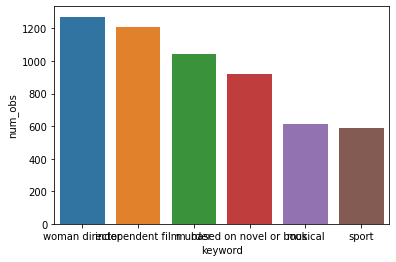

In [14]:
kw_info = pd.DataFrame.from_dict(unique_kw, orient='index', columns=['num_obs']).sort_values('num_obs', ascending=False)
kw_info['prop'] = round(kw_info['num_obs'] / df.shape[0], 4) * 100
kw_info = kw_info.reset_index().rename(columns={'index': 'keyword'})
display(kw_info.head(10))
sns.barplot(x=kw_info['keyword'].head(6), y=kw_info['num_obs'].head(6));
print("Average: {:,}".format(round(np.mean(kw_info['num_obs']))))
print("Median: {:,}".format(round(np.median(kw_info['num_obs']))))
print("Number of distinct: {:,}".format(kw_info.shape[0]))
top_ten_kw = list(kw_info['keyword'].head(10))

,production_company,num_obs,prop
0,Warner Bros. Pictures,857,3.01
1,Paramount,729,2.56
2,Universal Pictures,701,2.46
3,Columbia Pictures,661,2.32
4,20th Century Fox,646,2.27
5,Metro-Goldwyn-Mayer,622,2.18
6,Canal+,282,0.99
7,United Artists,246,0.86
8,Walt Disney Pictures,237,0.83
9,New Line Cinema,230,0.81


Average: 3.0
Median: 1.0
Number of distinct: 15,748


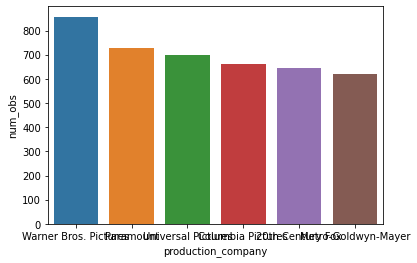

In [15]:
unique_prod_comp_info = pd.DataFrame.from_dict(unique_prod_comp, orient='index', columns=['num_obs']).sort_values('num_obs', ascending=False)
unique_prod_comp_info['prop'] = round(unique_prod_comp_info['num_obs'] / df.shape[0], 4) * 100
unique_prod_comp_info = unique_prod_comp_info.reset_index().rename(columns={'index': 'production_company'})
display(unique_prod_comp_info.head(10))
sns.barplot(x=unique_prod_comp_info['production_company'].head(6), y=unique_prod_comp_info['num_obs'].head(6));
print("Average: {:,}".format(round(np.mean(unique_prod_comp_info['num_obs']))))
print("Median: {:,}".format(round(np.median(unique_prod_comp_info['num_obs']))))
print("Number of distinct: {:,}".format(unique_prod_comp_info.shape[0]))
top_ten_prod_comp = list(unique_prod_comp_info['production_company'].head(10))

,production_country,num_obs,prop
0,US,14207,49.89
1,GB,2785,9.78
2,DE,2303,8.09
3,FR,2219,7.79
4,IT,1263,4.44
5,JP,1176,4.13
6,CA,1061,3.73
7,ES,629,2.21
8,IN,490,1.72
9,HK,455,1.60


Average: 228.0
Median: 7.0
Number of distinct: 141


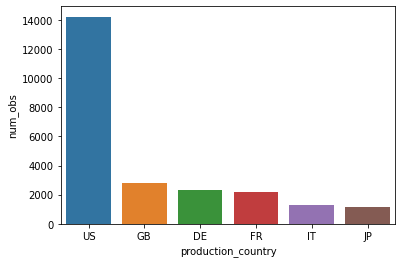

In [16]:
unique_prod_cont_info = pd.DataFrame.from_dict(unique_prod_cont, orient='index', columns=['num_obs']).sort_values('num_obs', ascending=False)
unique_prod_cont_info['prop'] = round(unique_prod_cont_info['num_obs'] / df.shape[0], 4) * 100
unique_prod_cont_info = unique_prod_cont_info.reset_index().rename(columns={'index': 'production_country'})
display(unique_prod_cont_info.head(10))
sns.barplot(x=unique_prod_cont_info['production_country'].head(6), y=unique_prod_cont_info['num_obs'].head(6));
print("Average: {:,}".format(round(np.mean(unique_prod_cont_info['num_obs']))))
print("Median: {:,}".format(round(np.median(unique_prod_cont_info['num_obs']))))
print("Number of distinct: {:,}".format(unique_prod_cont_info.shape[0]))
top_ten_prod_cont = list(unique_prod_cont_info['production_country'].head(10))

,spoken_language,num_obs,prop
0,en,18809,66.05
1,fr,2608,9.16
2,de,2455,8.62
3,es,1698,5.96
4,it,1408,4.94
5,ja,1182,4.15
6,ru,681,2.39
7,zh,479,1.68
8,hi,427,1.50
9,da,385,1.35


Average: 283.0
Median: 9.0
Number of distinct: 123


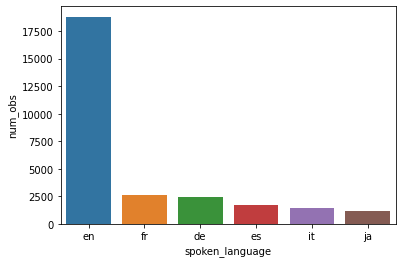

In [17]:
unique_sp_lang_info = pd.DataFrame.from_dict(unique_sp_lang, orient='index', columns=['num_obs']).sort_values('num_obs', ascending=False)
unique_sp_lang_info['prop'] = round(unique_sp_lang_info['num_obs'] / df.shape[0], 4) * 100
unique_sp_lang_info = unique_sp_lang_info.reset_index().rename(columns={'index': 'spoken_language'})
display(unique_sp_lang_info.head(10))
sns.barplot(x=unique_sp_lang_info['spoken_language'].head(6), y=unique_sp_lang_info['num_obs'].head(6));
print("Average: {:,}".format(round(np.mean(unique_sp_lang_info['num_obs']))))
print("Median: {:,}".format(round(np.median(unique_sp_lang_info['num_obs']))))
print("Number of distinct: {:,}".format(unique_sp_lang_info.shape[0]))
top_ten_sp_lang = list(unique_sp_lang_info['spoken_language'].head(10))

# NEXT STEP: Create indicator of item in list being in "top 10"
top_ten_kw
top_ten_prod_comp
top_ten_prod_cont
top_ten_sp_lang